<a href="https://colab.research.google.com/github/RahulSinghWaldia/TITANIC-WRECK-PREDICTION/blob/main/TITANIC_DISASTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1 - Data Exploration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install matplotlib==3.1.3



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
train = pd.read_csv(r"/content/sample_data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv(r"/content/sample_data/test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:

all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:

#Fill Missing numbers with median
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

In [8]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


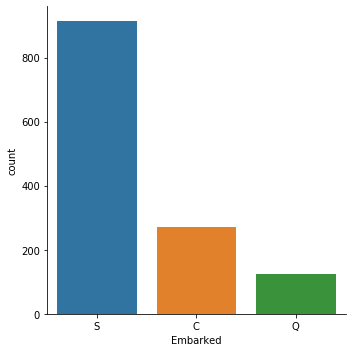

In [9]:
sns.catplot(x = 'Embarked', kind = 'count', data = all) #or all['Embarked'].value_counts()

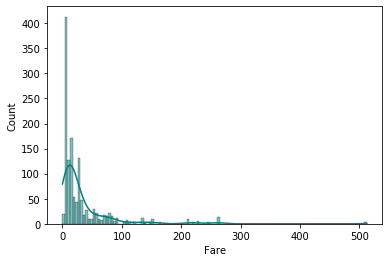

In [10]:
sns.histplot(data=all['Fare'], color='teal', kde=True)
plt.show()

In [11]:
import plotly.express as px
fig = px.bar(all.groupby(['Pclass', 'Age', 'Embarked'],as_index=False).size(), x='Pclass', y="Age", facet_col="Embarked", barmode='relative')
fig.show()

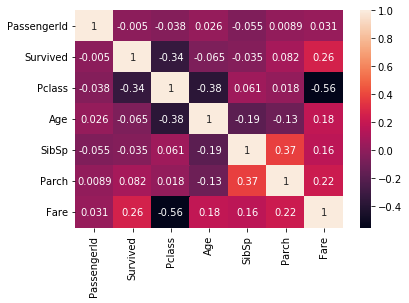

In [12]:
sns.heatmap(all.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f3fad31d0>,
      dtype=object)

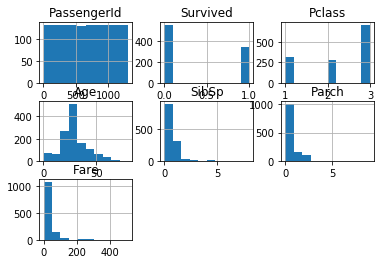

In [13]:
all.hist()


In [14]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


In [15]:
import plotly.express as px
fig = px.box(all, x='Pclass', y="Age", facet_col="Embarked")
fig.show()
fig1 = px.box(all, x='Pclass', y="Age")
fig1.show()
fig2 = px.box(all, x='Embarked', y="Age")
fig2.show()
# We can conclude here that the higher classes have more aged people as compared to the other classes so we will fill the missing ages with these means

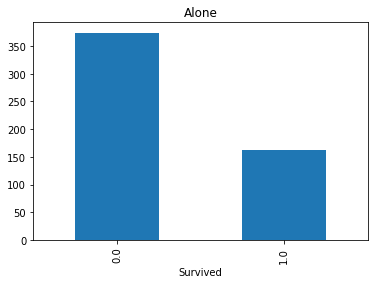

Text(0.5, 1.0, 'With Family')

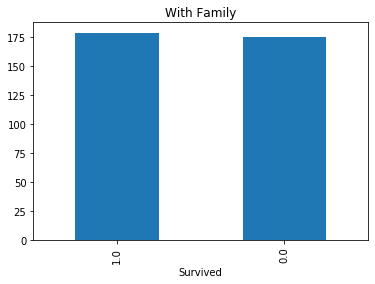

In [16]:
# Feature Engineering
all['IsAlone']=all['SibSp'] + all['Parch']
all['IsAlone']=all['IsAlone'].apply(lambda x: 0 if x >0 else 1)
all.groupby('IsAlone')['Survived'].value_counts()[1].plot(kind='bar')
plt.title('Alone')
plt.show()
all.groupby('IsAlone')['Survived'].value_counts()[0].plot(kind='bar')
plt.title('With Family')

In [17]:
#Age
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4 

In [18]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [19]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [20]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [21]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [22]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  IsAlone      1309 non-null   int64  
 13  Title        1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 185.7+ KB


In [23]:
#Family Size & Alone 
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,Title,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,0,Mr.,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,C,0,Mrs.,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,M,S,1,Miss.,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,0,Mrs.,2
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,1,Mr.,1


In [24]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  IsAlone      1309 non-null   int64  
 13  Title        1309 non-null   object 
 14  Family_Size  1309 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 195.9+ KB


In [25]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsAlone,Title,Family_Size
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,0,Mr.,2
1,2,1.0,1,female,2.0,1,0,71.2833,C,C,0,Mrs.,2
2,3,1.0,3,female,1.0,0,0,7.9250,M,S,1,Miss.,1
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,0,Mrs.,2
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,1,Mr.,1


In [26]:
all_dummies = pd.get_dummies(all_1)
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Age             1309 non-null   float64
 4   SibSp           1309 non-null   int64  
 5   Parch           1309 non-null   int64  
 6   Fare            1309 non-null   float64
 7   IsAlone         1309 non-null   int64  
 8   Family_Size     1309 non-null   int64  
 9   Sex_female      1309 non-null   uint8  
 10  Sex_male        1309 non-null   uint8  
 11  Cabin_A         1309 non-null   uint8  
 12  Cabin_B         1309 non-null   uint8  
 13  Cabin_C         1309 non-null   uint8  
 14  Cabin_D         1309 non-null   uint8  
 15  Cabin_E         1309 non-null   uint8  
 16  Cabin_F         1309 non-null   uint8  
 17  Cabin_G         1309 non-null   ui

In [27]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   IsAlone         891 non-null    int64  
 8   Family_Size     891 non-null    int64  
 9   Sex_female      891 non-null    uint8  
 10  Sex_male        891 non-null    uint8  
 11  Cabin_A         891 non-null    uint8  
 12  Cabin_B         891 non-null    uint8  
 13  Cabin_C         891 non-null    uint8  
 14  Cabin_D         891 non-null    uint8  
 15  Cabin_E         891 non-null    uint8  
 16  Cabin_F         891 non-null    uint8  
 17  Cabin_G         891 non-null    uin

In [28]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   IsAlone         418 non-null    int64  
 8   Family_Size     418 non-null    int64  
 9   Sex_female      418 non-null    uint8  
 10  Sex_male        418 non-null    uint8  
 11  Cabin_A         418 non-null    uint8  
 12  Cabin_B         418 non-null    uint8  
 13  Cabin_C         418 non-null    uint8  
 14  Cabin_D         418 non-null    uint8  
 15  Cabin_E         418 non-null    uint8  
 16  Cabin_F         418 non-null    uint8  
 17  Cabin_G         418 non-null    uin

Train/Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1), 
                                                    all_train['Survived'], test_size=0.30, 
                                                    random_state=101)

Build Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
RF_Model = RandomForestClassifier()

In [32]:
RF_Model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
RF_Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=6,
                       n_estimators=10, n_jobs=-1)

In [34]:
predictions = RF_Model.predict(X_test)
predictions

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0.

In [35]:
print(f'Test : {RF_Model.score(X_test, y_test):.3f}')
print(f'Train : {RF_Model.score(X_train, y_train):.3f}')

Test : 0.806
Train : 0.875


Final Predictions

In [36]:
all_test.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,Family_Size,Sex_female,...,Embarked_C,Embarked_Q,Embarked_S,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,892,NaN,3,2.0,0,0,7.8292,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1,893,NaN,3,2.0,1,0,7.0000,0,2,1,...,0,0,1,0,0,0,0,1,0,0
2,894,NaN,2,3.0,0,0,9.6875,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,895,NaN,3,1.0,0,0,8.6625,1,1,0,...,0,0,1,0,0,0,1,0,0,0
4,896,NaN,3,1.0,1,1,12.2875,0,3,1,...,0,0,1,0,0,0,0,1,0,0


In [37]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [38]:
t_pred = RF_Model.predict(TestForPred).astype(int)


In [40]:
PassengerId = all_test['PassengerId']

In [41]:
RF_Sub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })
RF_Sub.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [42]:
RF_Sub.to_csv("RF_Class_Submission.csv", index = False)